In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from metas_unclib import *

Definiciones

In [3]:
# WD = np.array([13.072,11.153,10.792,10.107,9.403,8.364])
# pixels = np.array([5642.95, 5656.04, 5692.85, 5637.80, 5579.40, 5558.57], dtype=float)
# u_pixels = np.array([0.053, 0.056, 0.052, 0.056, 0.051, 0.049])

WD = np.array([10.792,10.107,9.403])
pixels = np.array([ 5692.85, 5637.80, 5579.40], dtype=float)
u_pixels = np.array([0.052, 0.056, 0.051])

Ajuste

In [4]:
ORDEN = 1

In [5]:
WD_u = [ufloat(v) for v in WD]
pixels_u = [ufloat(v, u) for v, u in zip(pixels, u_pixels)]

model = unumlib.polyfit(WD_u, pixels_u, ORDEN)  # Definir orden del ajuste

model_vals = unumlib.polyval(model, WD_u)
r2 = r2_score(pixels, get_value(model_vals))

print("Coeficientes:", model)
print("Coeficiente de determinación R^2:", r2)

Coeficientes: [81.68336810448083 ± 0.05243123685094554
 4811.626859899341 ± 0.529984197759758]
Coeficiente de determinación R^2: 0.9999162937796824


Gráfico

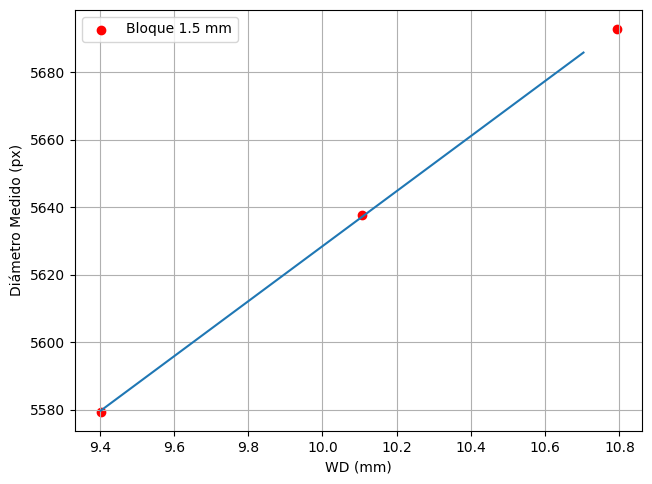

In [7]:
x = np.arange(WD.min(), WD.max(), 0.1)
x_ = ufloatarray(x, np.zeros((len(x), len(x))) )

y = unumlib.polyval(model, x_)

mens = np.array(get_value(y))
unc = np.array(get_stdunc(y))

fig, ax = plt.subplots()
plt.tight_layout()
ax.plot(x, mens)
ax.fill_between(x, mens-unc, mens+unc ,alpha=0.3)
ax.scatter(WD, pixels, c='r', label='Bloque 1.5 mm')
ax.set_xlabel('WD (mm)') 
ax.set_ylabel('Diámetro Medido (px)') 
ax.grid()
ax.legend()

Evaluar en WD del patron/DUT

In [ ]:
# CASO 1: Barrido en DUT
wd_pat = 9.65993
peso_pixel = ufloat(0.2695, 1e-05)

diam_ajustado = unumlib.polyval(model, [wd_pat])
diam = peso_pixel * diam_ajustado[0]

print(diam_ajustado)
print("Diametro Linea: ", diam)

In [13]:
# CASO 2: Barrido en Patron
wd_dut = 9.66
pixels_dut = ufloat(5589.8984063745, 0.0516336944131006)

ancho_ajustado = unumlib.polyval(model, [wd_dut])

peso_pixel = 1500/ancho_ajustado

diam = peso_pixel * pixels_dut

print(ancho_ajustado)
print(peso_pixel)
print("Diametro Linea: ", diam)

[5600.688195788626 ± 0.038065732922230235]
[0.2678242293737952 ± 1.8202987256299993e-06]
Diametro Linea:  [1497.1102329650564 ± 0.017168892579843078]


Guardado

In [18]:
ustorage.save_binary_file(diam, "diam_ajustado.ufloat")

In [ ]:
# Carga
ustorage.load_binary_file("diam_ajustado.ufloat")